# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [545]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [547]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    #проверка tuple or int. Более клевого способа не придумал:(
    if not isinstance(size, tuple):
        size = (size,)
    return np.sum(coin( size + (precision,) ) / np.tile(np.exp2(np.arange(1, precision + 1)), 
                                                        size + (1,)), axis=-1) # В одну строчку? ;)

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

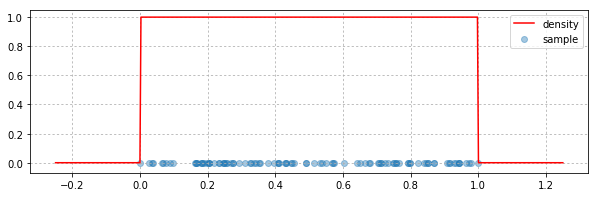

In [548]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)

plt.figure(figsize=(10, 3))
plt.scatter(uniform(size, 50),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.uniform.pdf(grid),
         #<Посчитайте плотность в точках grid, используя sps.uniform.pdf>,
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

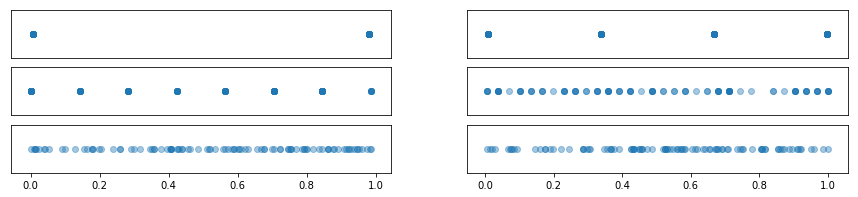

In [549]:
size = 100
plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(#<Сгенерируйте выборку размера size точности precision>
                uniform(size, precision),
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:**

При увеличении precision выборка все более приближает выборку нормального распределения. 

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [550]:
def normal(size=1, loc=0, scale=1, precision=30):
    if not isinstance(size, tuple):
        size = (size,)
    return scale * np.cos(2 * np.pi * uniform(size, 
                                              precision)) * np.sqrt(-2 * np.log(uniform(size, 
                                                                                        precision))) + loc 

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

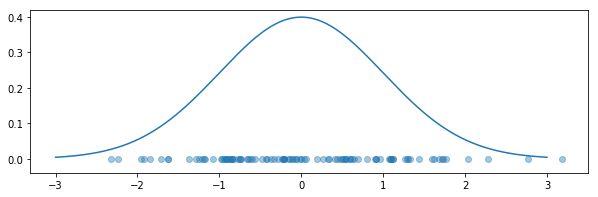

In [551]:
x = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10, 3))
plt.scatter(normal(size=100, precision=50), np.zeros(100), alpha=0.4)
plt.plot(x, sps.norm.pdf(x, loc=0, scale=1))
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

**Решение**: Пусть $I = (-\infty, x]$. Тогда $\frac{I-a}{\sigma} = (-\infty, \frac{x-a}{\sigma}]$. 
Отсюда получаем $F_{a,\sigma} (x) = P_{a,\sigma} ( (-\infty, x]) = P((-\infty, \frac{x-a}{\sigma}] ) = F(\frac{x-a}{\sigma})$
    
Дифференцируем и получаем ответ: $p_{a,\sigma} (x) = p(\frac{x-a}{\sigma}) \frac{1}{\sigma}$

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

**Ответ:** 
$p_{a, \sigma}(x) = \frac{1}{\sigma} \frac{1}{\sqrt{2\pi}} e^{-\frac{( [x-a]/\sigma)^2}{2}} =  \frac{1}{\sqrt{2\pi\sigma^2}} exp [-\frac{(x-a)^2}{2\sigma^2}]$

а это означает, что плотность любого распределения из семества параметризованных распределения для стандартного нормального распределения имеет плотность распределения $\mathcal(a,\sigma^2)$, откуда $\{ P_{a,\sigma}\} = \{ \text{все нормальные распределения с мат.ожиданием $a$ и дисперсией $\sigma^2$ }\}$

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

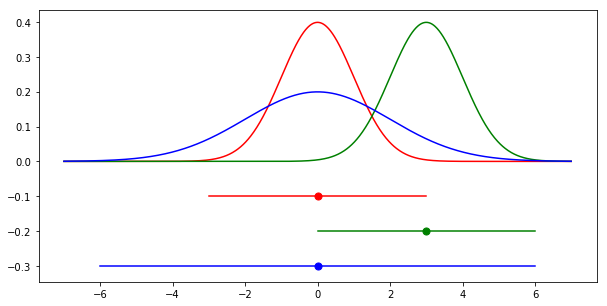

In [552]:
plt.figure(figsize=(10, 5))
x = np.linspace(-7, 7, 1000)
a, sigma = 0, 1
plt.plot(x, sps.norm.pdf(x, loc=a, scale=sigma), 'r')
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.1, -0.1], color='red')
plt.scatter(a, -0.1, color='red', s=50)
a, sigma = 3, 1
plt.plot(x, sps.norm.pdf(x, loc=a, scale=sigma), 'g')
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.2, -0.2], color='green')
plt.scatter(a, -0.2, color='g', s=50)
a, sigma = 0, 2
plt.plot(x, sps.norm.pdf(x, loc=a, scale=sigma), 'b')
plt.plot([a - 3 * sigma, a + 3 * sigma], [-0.3, -0.3], color='blue')
plt.scatter(a, -0.3, color='blue', s=50)
plt.show()

**Вывод:**

Плотность распределения симметрична относительно точки $a$, что означает, что медианой нормального распределения является его мат.ожидание. И почти вся плотность (по правилу $3\sigma$ - $99.7 \%$ ) сосредоточена в отрезке $[a - 3\sigma, a + 3\sigma]$. Более строго это можно доказать, используя предсказательные интервалы:
Пусть случайная величина $X$ имеет функцию распределения $F(x)$, $X_{\alpha}$ - квантиль порядка $\alpha$. Тогда

$P(X_{ \frac{ \alpha }{2} } \leq x \leq X_{1 - \frac{\alpha}{2}} ) = P(X_{ \frac{ \alpha }{2} } \leq x) - P(x > X_{1 - \frac{\alpha}{2}}) = 1 - \dfrac{\alpha}{2} -  \dfrac{\alpha}{2} = 1 - \alpha$. Отсюда $\left[X_{ \frac{ \alpha }{2} }, X_{1 - \frac{\alpha}{2}}\right]$ предсказательный интервал порядка $1 - \alpha$.

Если $X \sim \mathcal{N}(a, \sigma^{2})$, то квантили $X$ выражаются через  $a, \sigma$ и $z$ -- квантили стандартного нормального распределения так: $X_{\frac{\alpha}{2}} = a - \sigma z_{\frac{\alpha}{2}}, X_{1 - \frac{\alpha}{2}} = a + \sigma z_{1 - \frac{\alpha}{2}}$ . Отсюда, взяв предсказательный интервал примерно $0.997$, т.е $\alpha = 0.003$  получим оценку на $\sigma z_{\frac{\alpha}{2}}$ примерно равную $3$. 

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [553]:
from scipy.linalg import eigh, inv

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [554]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    size_gauss_vector = cov_matrix.shape[0]
    eigen_values, eigen_vectors = eigh(cov_matrix)
    d_matrix = np.diag(eigen_values)
    r_matrix = np.array(eigen_vectors)
    # d_matrix -- диагональная с неотр. числами на диагонали
    a_matrix = inv(r_matrix) @ np.sqrt(d_matrix)
    b_matrix = np.tile(mean.reshape(1, mean.shape[0]).T, size)
    # \ksi = a_matrix * \eta + b_matrix, где \eta -- вектор, сотоящий 
    # из независмых стандартных нормальных распределений
    return (a_matrix @ normal(size=(size_gauss_vector, size)) + b_matrix).T

In [555]:
gauss(mean=[1, 1], cov_matrix=[[2, 1], [1, 2]], size=3)

array([[ 1.84962852, -0.86418049],
       [ 2.61179506,  2.90080549],
       [ 0.87281796, -0.4673657 ]])

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

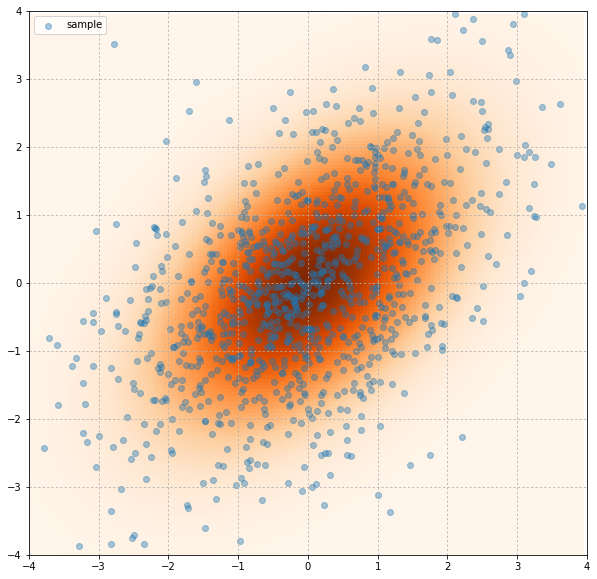

In [562]:
size = 1000
mean, cov_matrix = [0, 0], [[2, 1], [1, 2]]
sample = gauss([0, 0], [[2, 1], [1, 2]], size, 100)  # Генерация выборки
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
density = sps.multivariate_normal.pdf(pos, mean, cov_matrix)  # Вычисление плотности
plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:**

Убедились, что и в многомерном случае большинство элементов выборки попадает в область с наибольшей плотностью.

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [563]:
def expon(size=1, lambd=1, precision=30):
    # по задаче 6.9 получаем, что X_i = - 1 / lambd * ln(1 - U_i), 
    # где U_i - с.в. из U([0, 1])
    return - 1 / lambd * np.log(1 - uniform(size, precision))

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

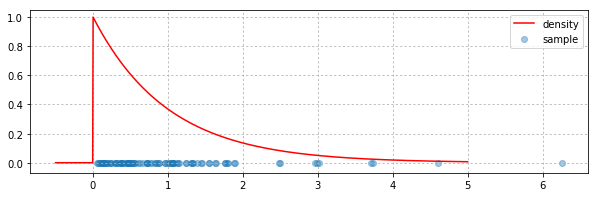

In [564]:
size = 100
grid = np.linspace(-0.5, 5, 1000)

plt.figure(figsize=(10, 3))
plt.scatter(expon(size, lambd=1, precision=50),
            np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.expon.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**

Получили, что из метода обратного преобразования (https://ru.wikipedia.org/wiki/Метод_обратного_преобразования) мы можем сгенерировать выборку экспоненциального распределения из выборки равномерного. И опять же убедились, что большинство элементов выборки попадает в ту область пространства, где плотность выше.

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [565]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

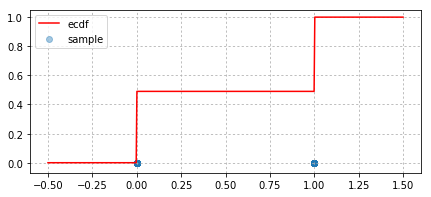

In [566]:
sample = coin(size=100)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [266]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
    
        plt.scatter(sample[:size], np.zeros_like(sample[:size]),
            #<Первые size точек из sample с нулевой y-координатой>, 
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, 
                     #<Значения функции распределения в точках grid>,
                     cdf(grid), 
                     color='green', alpha=0.3, lw=2, label='true cdf')
        
        plt.plot(grid,
                 ECDF(sample[:size])(grid),
                 #<Значения эмпирической функции распределения 
                 #(по первым size точек из sample) в точках grid>, 
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[:size],
            #<Постройте гистограмму по первым size точек из sample>, 
                 bins=20,
                 #<Установите 20 ячеек>,
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, 
                     pdf(grid),
                     #<Значения плотности в точках grid>, 
                     color='green', alpha=0.3, lw=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
        
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(sample[:size], np.zeros_like(sample[:size]),
            #<Первые size точек из sample с нулевой y-координатой>, 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     pdf(grid),
                     #<Значения плотности в точках grid>,
                     color='green', alpha=0.3, lw=2, label='true pdf')
        
        plt.plot(grid,
                 kernel_density.evaluate(grid),
                 #<Значение ядерной оценки плотности (по первым size точек из sample) 
                 #в точках grid (используйте evaluate)>,
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()

При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetoolspy` замените строку 20 на

`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j`

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

## выборки размера 500 из распределения $U[0, 1]$

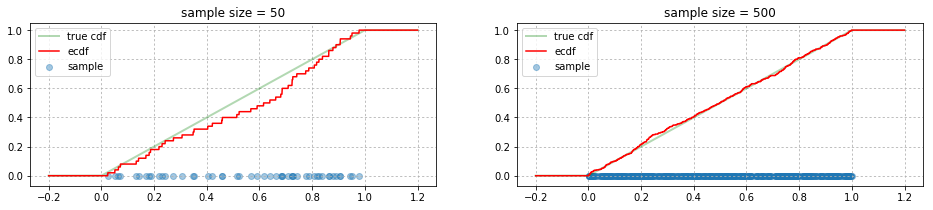

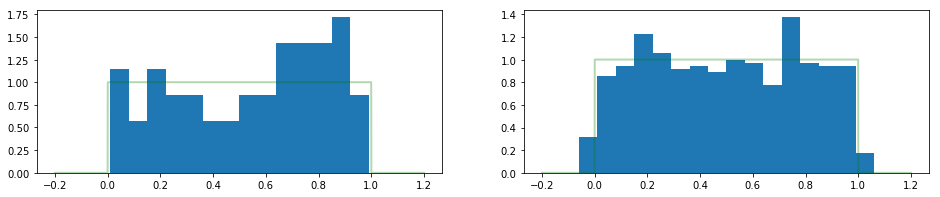

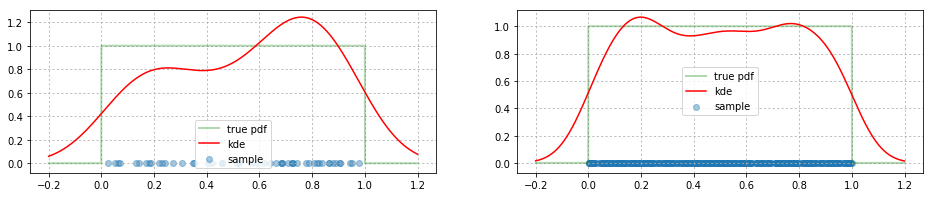

In [267]:
sample_uniform = uniform(size=500, precision=100)
grid_uniform = np.linspace(-0.2, 1.2, 2400)
cdf_uniform = sps.uniform.cdf
pdf_uniform = sps.uniform.pdf
draw_ecdf(sample_uniform, grid_uniform, cdf_uniform)
draw_hist(sample_uniform, grid_uniform, pdf_uniform)
draw_pdf(sample_uniform, grid_uniform, pdf_uniform)

## выборки размера 500 из распределения $\mathcal{N}(0, 1)$

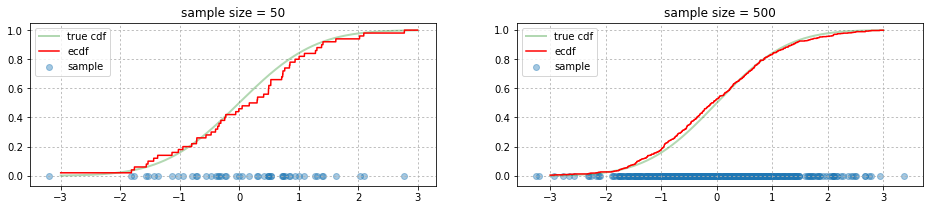

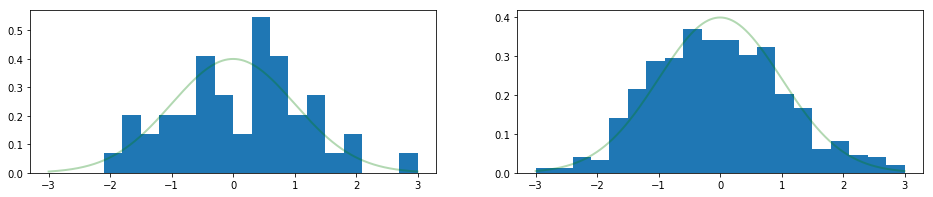

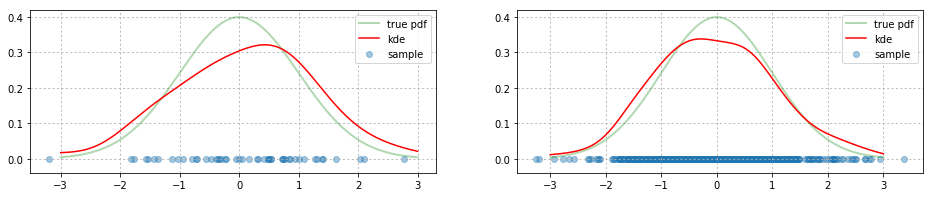

In [268]:
sample_norm = normal(size=500, precision=100)
grid_norm = np.linspace(-3, 3, 6000)
cdf_norm = sps.norm.cdf
pdf_norm = sps.norm.pdf
draw_ecdf(sample_norm, grid_norm, cdf_norm)
draw_hist(sample_norm, grid_norm, pdf_norm)
draw_pdf(sample_norm, grid_norm, pdf_norm)

## выборки размера 500 из распределения $Exp(1)$

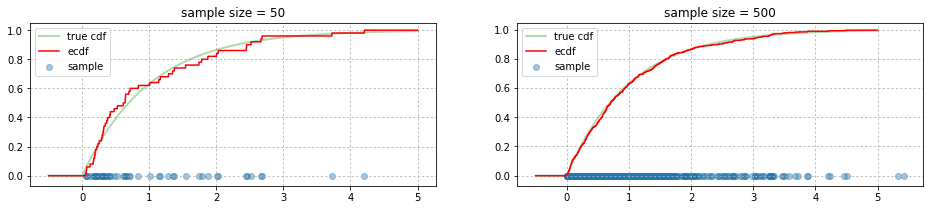

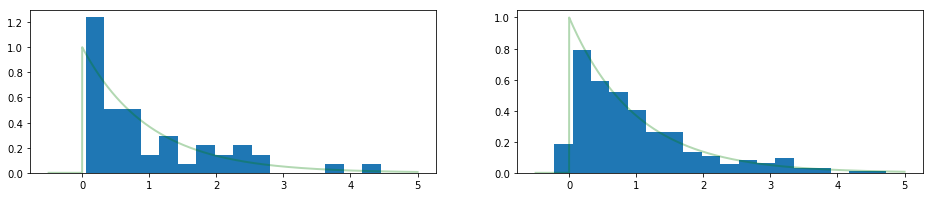

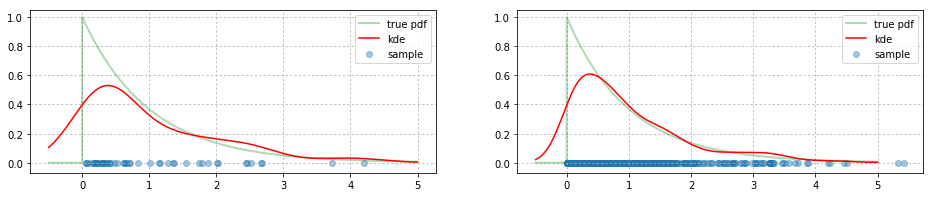

In [269]:
sample_expon = expon(size=500, precision=100)
grid_expon = np.linspace(-0.5, 5, 5500)
cdf_expon = sps.expon.cdf
pdf_expon = sps.expon.pdf
draw_ecdf(sample_expon, grid_expon, cdf_expon)
draw_hist(sample_expon, grid_expon, pdf_expon)
draw_pdf(sample_expon, grid_expon, pdf_expon)

**Вывод:**

Проанализировав графики для всех трех распределений можно сделать следующие выводы:
1. Чем больше размер выборки, тем лучше эмпирическая функция распределения и ядерная оценка плотности приближают реальную плотнсоть распределения и реальную плотность
2. Доля элементов выборки на некотором отрезке прямопропорционально зависит от значения плотности на этом отрезке


Обобщая все вышесказанное: чем больше размер выборки, тем более точно мы можем понять параметры нашего распределения:) 

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод

In [270]:
size = 10000
sample = sps.norm.rvs(size = size)
ecdf_array = list(map(lambda i_size: ECDF(sample[:i_size]), np.arange(1, size + 1, 1)))

Эмпирическая функция распределения кусочно-непрерывная, значит для точного вычисления следует посчитать только разность на концах, поэтому:

In [271]:
D_array = list(map(lambda ecdf_: max(ecdf_.y - sps.norm.cdf(ecdf_.x)), ecdf_array))

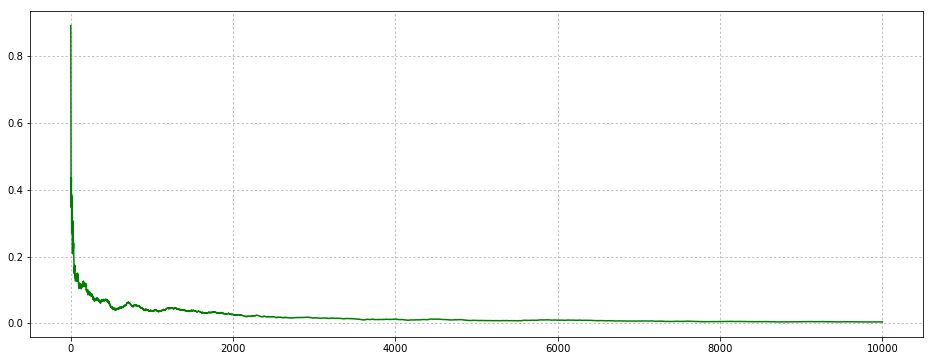

In [318]:
plt.figure(figsize=(16, 6))
plt.plot(np.arange(1, size + 1, 1), D_array, 'g')
plt.grid(ls=':')
plt.show()

**Вывод:** Ура! На примере выборки из $\mathcal{N}(0, 1)$ мы проверели справедливость теоремы Гливенко-Кантелли, которая говорит нам, что почти наверное $D_n \to 0$.

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

In [281]:
from sklearn.neighbors import KernelDensity

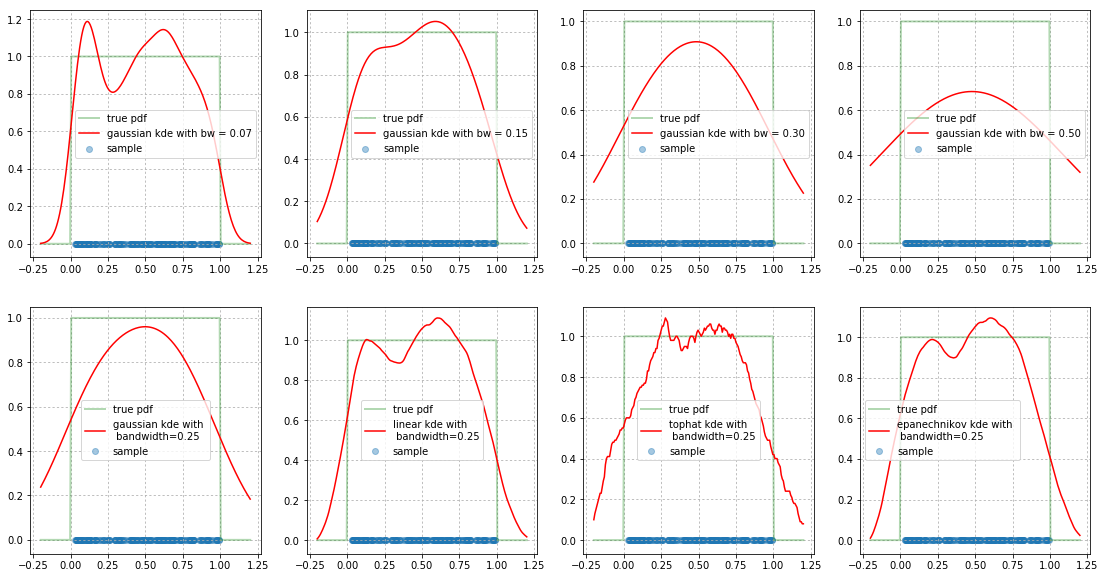

In [311]:
sample = sps.uniform.rvs(size=200)[:, np.newaxis]
grid = np.linspace(-0.2, 1.2, 200)[:, np.newaxis] 
kernel_density = KernelDensity()

plt.figure(figsize=(19, 10))

bandwidths = [0.075, 0.15, 0.3, 0.5]
for i, bandwidth in enumerate(bandwidths):
    plt.subplot(2, 4, i + 1)
    kernel_density = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kernel_density.fit(sample)
    
    plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample') # точки выборки
    plt.plot(grid, sps.uniform.pdf(grid), color='green', alpha=0.3, lw=2, label='true pdf') # истинная плотность
    plt.plot(grid, np.exp(kernel_density.score_samples(grid)), color='red', 
             label='gaussian kde with bw = %.2f'%bandwidth)
    plt.legend(loc='best')
    plt.grid(ls=':')

kernels = ['gaussian', 'linear', 'tophat', 'epanechnikov']
for i, kernel in enumerate(kernels):
    plt.subplot(2, 4, i + 1 + 4)
    kernel_density = KernelDensity(kernel=kernel, bandwidth=0.25)
    kernel_density.fit(sample)
    
    plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample') # точки выборки
    plt.plot(grid, sps.uniform.pdf(grid), color='green', alpha=0.3, lw=2, label='true pdf') # истинная плотность
    plt.plot(grid, np.exp(kernel_density.score_samples(grid)), color='red', 
             label='%s kde with \n bandwidth=0.25'%kernel)
    plt.legend(loc='best')
    plt.grid(ls=':')
    
plt.show()

**Вывод:** Найти оптимальную ядерную оценку плотность, значит (в большей своей части) подобрать 2 основных параметра:
тип ядра и ширину ядра. Типом ядра по-сути определеяется формула построения ядра, а ширина влияет на точность апроксимации: из-за слишком большой ширины ядра ядерная оценка плотности вырождается в прямую, а из-за слишком маленькой -- к большим колебаниям полученной плотности Оптимальные значения нужно подбирать по данной нам выборке (в этом мы убедимся в следующей задаче, где оптимальной шириной будет является число порядка 100000)

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

In [312]:
import pandas as pd
# с pandas намного легче будет работать с датафреймом

In [313]:
df = pd.read_csv('countries.csv', delimiter='\t', header=None, 
                 index_col=0, names=['ind', 'country', 'square'])

In [314]:
df.head()

country      square
ind                           
1           Russia  17125191.0
2           Canada   9984670.0
3            China   9596961.0
4    United States   9525067.0
5           Brazil   8515767.0

In [381]:
sample = df['square'].values.T

In [382]:
grid = np.linspace(-50000, 1000000, 1050000)
ecdf = ECDF(sample)
kernel_density = KernelDensity(bandwidth=100000)
kernel_density.fit(sample[:, np.newaxis])

KernelDensity(algorithm='auto', atol=0, bandwidth=100000, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

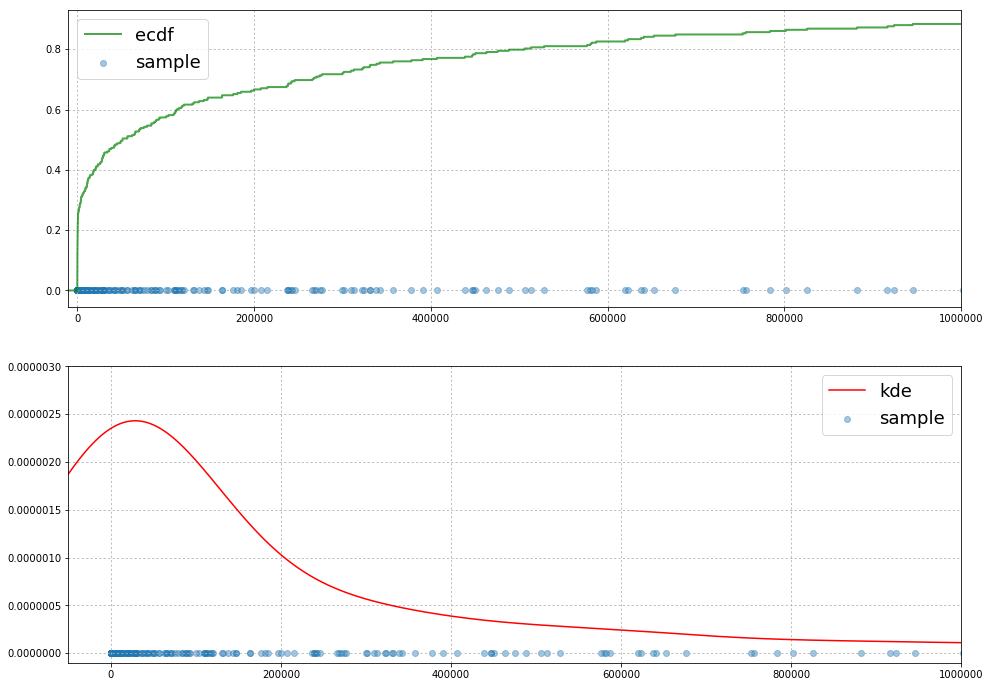

In [383]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 1, 1)
plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample') # точки выборки
plt.plot(grid, ecdf(grid), color='green', alpha=0.7, lw=2, label='ecdf')
plt.xlim((-10000, 1000000))
plt.legend(loc='best', prop={'size':18})
plt.grid(ls=':')

plt.subplot(2, 1, 2)
plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample') # точки выборки
plt.plot(grid[:, np.newaxis], np.exp(kernel_density.score_samples(grid[:, np.newaxis])), 
         color='red', label='kde')
plt.xlim((-50000, 1000000))
plt.ylim((-0.0000001, 0.000003))
plt.legend(loc='best', prop={'size':18})
plt.grid(ls=':')

plt.show()

**Вывод:** по полученным графикам (особенно по ядерной оценке плотности) можно сделать вывод, что распределение площади стран можно приблизить гамма распределением с некоторыми параметрами $a, scale$. Попытаемся их подобрать

In [512]:
grid = np.linspace(0, 1000000, 1005000)
def optimized_fuc(a_, scale_):
    return mean_squared_error(ecdf(grid), sps.gamma.cdf(grid, a=a_, scale=scale_))

In [343]:
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [364]:
grid = np.linspace(0, 2000, 2000)
def optimized_fuc(lambd):
    return mean_squared_error(ecdf(grid), sps.expon.cdf(grid, scale=1/lambd))

In [534]:
a_array = np.linspace(0.2, 0.3, 20)
scale_array = np.linspace(1500000, 1650000, 20)
minimum = 100000
a_opt, scale_opt = -1, -1
for a in a_array:
    for scale in scale_array:
        opt = optimized_fuc(a, scale)
        if opt < minimum:
            minimum = opt
            a_opt = a
            scale_opt = scale
print("best a = ", a_opt, "best scale = ", scale_opt, "best MSE = ", minimum)

best a =  0.226315789474 best scale =  1602631.57895 best MSE =  2.58160515988e-05


Посмотрим, как полчилось сапроксимировать гамма распределением с параметрами a_opt и scale_opt

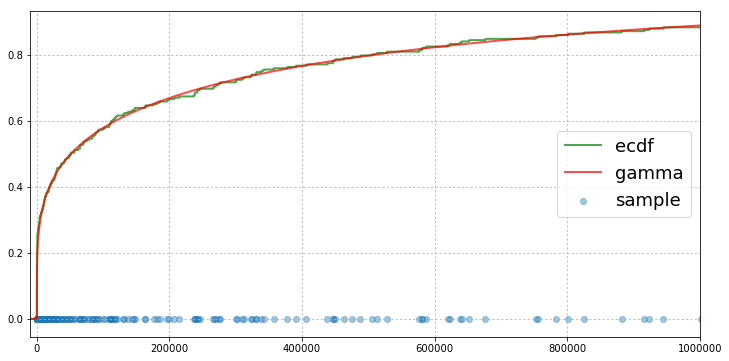

In [535]:
plt.figure(figsize=(12, 6))
grid = np.linspace(-50000, 1000000, 1005000)

plt.scatter(sample, np.zeros_like(sample), alpha=0.4, label='sample') # точки выборки
plt.plot(grid, ecdf(grid), color='green', alpha=0.7, lw=2, label='ecdf')
plt.plot(grid, sps.gamma.cdf(grid, a=a_opt, scale=scale_opt), color='red', alpha=0.7, lw=2, label='gamma')
plt.xlim((-10000, 1000000))
plt.legend(loc='best', prop={'size':18})
plt.grid(ls=':')

plt.show()

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

In [536]:
# pip install vk
import vk
import time

смотрим на количество друзей участников группы inter oves locum praesta https://vk.com/interoveslocumpraesta

In [537]:
# в целях безопасности удалю токен. Если потребуется запустить ячейку, то могу скинуть уж:)
token ='**********************************************************************************'
session = vk.Session(access_token=token)
api = vk.API(session)
# с
group_members = api.groups.getMembers(group_id=80749489)['users']
# sample = list(map(lambda user_id_: len(api.friends.get(user_id=user_id_)),
# list_my_friends)) слишком много запросов
# в секунду для апи вконтакте
sample_vk = []
for id_ in group_members:
    if 'deactivated' not in api.users.get(user_id=id_)[0]:
        time.sleep(0.4)
        try:
            sample_vk.append(len(api.friends.get(user_id=id_)))
            time.sleep(0.4)
        except Exception:
            print("except")

In [538]:
np.mean(sample_vk)

262.67213114754099

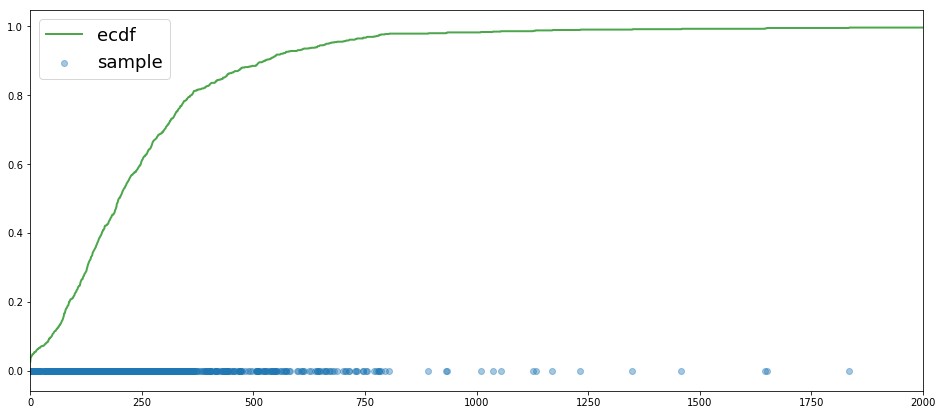

In [539]:
grid = np.linspace(0, 2000, 2000)
plt.figure(figsize=(16, 7))
plt.scatter(sample_vk, np.zeros_like(sample_vk), alpha=0.4, label='sample')
ecdf = ECDF(sample_vk)
plt.plot(grid, ecdf(grid), color='green', alpha=0.7, lw=2, label='ecdf')
plt.xlim((0, 2000))
plt.legend(loc='best', prop={'size':18})
plt.show()

**Вывод:** Распределение количества друзей случайных n человек в социальной сети можно приближать экспоненциальным распределением. Давайте-ка подберем нужный параметр $\lambda$

In [540]:
grid = np.linspace(0, 2000, 2000)
def optimized_fuc(lambd):
    return mean_squared_error(ecdf(grid), sps.expon.cdf(grid, scale=1/lambd))

поймем как меняется среднеквадратичная ошибка в зависимости от $\lambda$

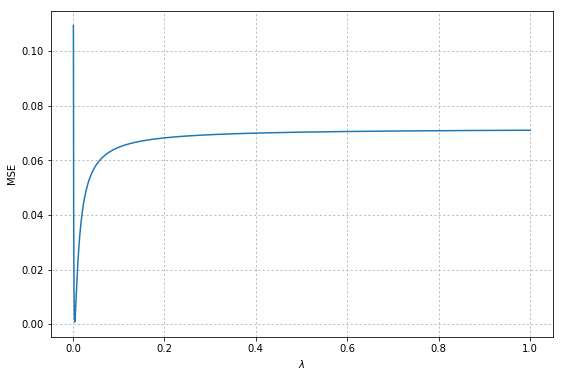

In [541]:
plt.figure(figsize=(9, 6))
lambd_array = np.linspace(0.001, 1, 10000)
plt.plot(lambd_array, [optimized_fuc(lambd) for lambd in lambd_array])
plt.xlabel('$\lambda$')
plt.ylabel('MSE')
plt.grid(ls=':')
plt.show()

Найдем оптимальную лямбду ручками :)

In [542]:
lambda_min = -1
minimum = 100
for lambd in lambd_array:
    if optimized_fuc(lambd) < minimum:
        minimum = optimized_fuc(lambd)
        lambda_min = lambd
print("min lambda = ", lambda_min, "min MSE = ", minimum)

min lambda =  0.00389738973897 min MSE =  0.000819950301068


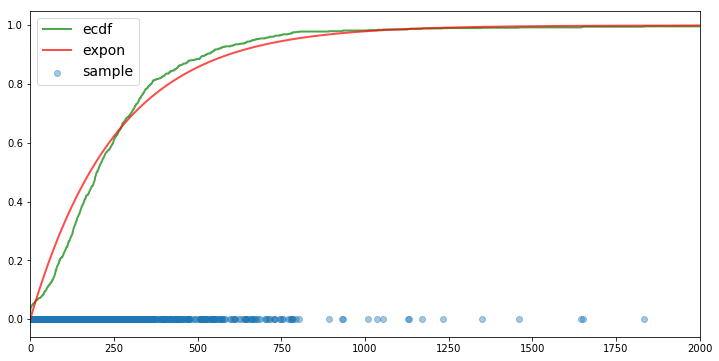

In [543]:
grid = np.linspace(0, 2000, 2000)
plt.figure(figsize=(12, 6))
plt.scatter(sample_vk, np.zeros_like(sample_vk), alpha=0.4, label='sample')
ecdf = ECDF(sample_vk)
plt.plot(grid, ecdf(grid), color='green', alpha=0.7, lw=2, label='ecdf')
plt.plot(grid, sps.expon.cdf(grid, scale=1/lambda_min), color='red', alpha=0.7, lw=2, label='expon')
plt.xlim((0, 2000))
plt.legend(loc='best', prop={'size':14})
plt.show()